<a href="https://colab.research.google.com/github/HowardHNguyen/Python/blob/main/Customer_Behavior_Analysis_DS_for_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# percentage
def percentage(a,b):
  if b== 0:
    return None
  return ((a/b)*100)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [ ]:
data.shape

(9134, 24)

In [ ]:
data.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [ ]:
# percentage
def percentage(a,b):
  if b== 0:
    return None
  return ((a/b)*100)

In [ ]:
# ANALYSIS ON ENGAGED CUSTOMERS

In [ ]:
data.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

In [ ]:
percentage(1308,7826)

16.713519039100436

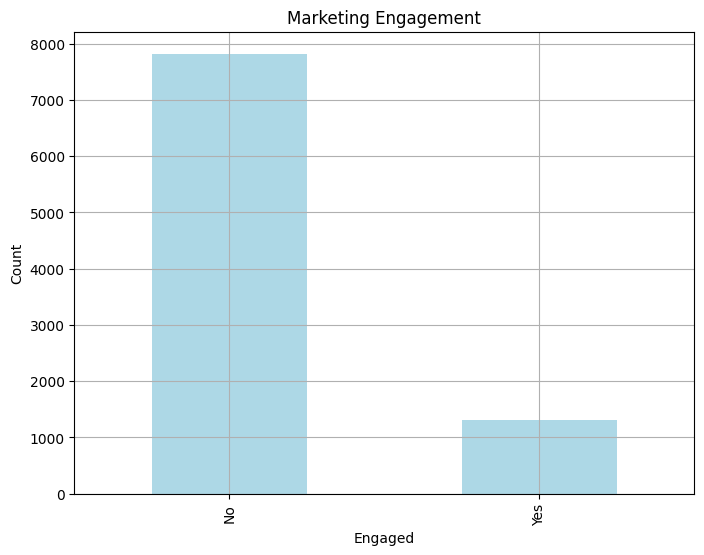

In [ ]:
ax = data.groupby('Response').count()['Customer'].plot(
    kind = 'bar', color='lightblue', grid=True, figsize=(8,6), title='Marketing Engagement'
)
ax.set_xlabel('Engaged')
ax.set_ylabel('Count')
plt.show()

In [ ]:
data.groupby('Response').count()['Customer']/data.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

In [ ]:
# ENGAGEMENT RATE BY OFFER TYPE

In [ ]:
# Different types of offer will work differently for the customers.
# in this section, we are going to look into what ypes of offers worked best for the engaged customers.
by_offer_type_data = data.loc[
    data['Response'] == 'Yes'
].groupby([
    'Renew Offer Type'
]).count()['Customer']/data.groupby('Renew Offer Type').count()['Customer']

by_offer_type_data

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

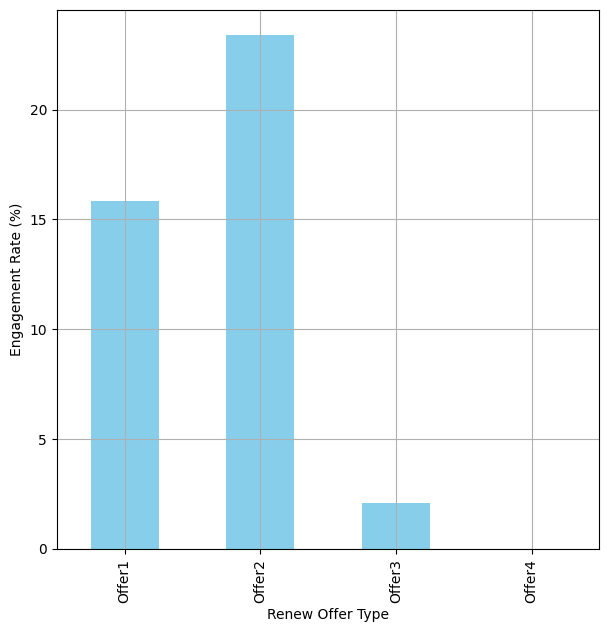

In [ ]:
ax = (by_offer_type_data*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

In [ ]:
# OFFER TYPE & VIHECLE CLASS

In [ ]:
by_offer_type_data = data.loc[data['Response'] == 'Yes'].groupby(['Renew Offer Type', 'Vehicle Class']).count()['Customer']/data.groupby('Renew Offer Type').count()['Customer']

by_offer_type_data

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [ ]:
by_offer_type_data = by_offer_type_data.unstack().fillna(0)
by_offer_type_data

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


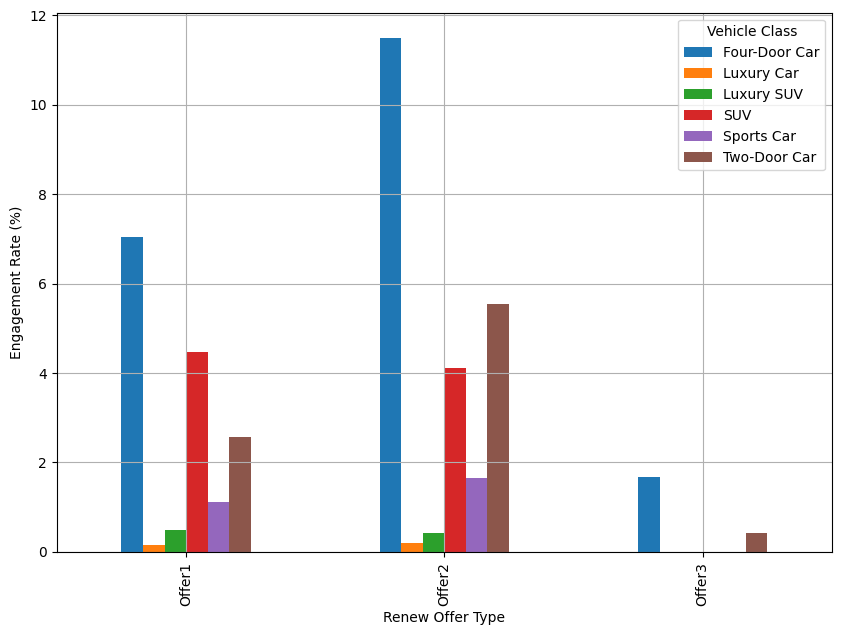

In [ ]:
ax = (by_offer_type_data*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

In [ ]:
# ENGAGEMENT RATES BY SAELES CHANNELS

In [ ]:
by_sales_channel_data = data.loc[data['Response'] == 'Yes'].groupby(['Sales Channel']).count()['Customer']/data.groupby('Sales Channel').count()['Customer']
by_sales_channel_data

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

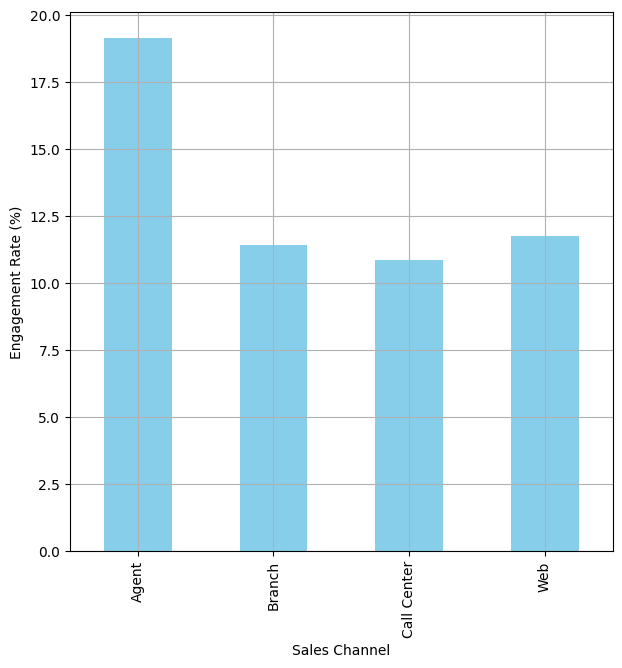

In [ ]:
ax = (by_sales_channel_data*100.0).plot(
    kind='bar',
    figsize=(7, 7),
    color='skyblue',
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

In [ ]:
# SALES CHANNEL & VEHICLE SIZES

In [ ]:
by_sales_channel_data = data.loc[data['Response'] == 'Yes'].groupby(['Sales Channel', 'Vehicle Size']).count()['Customer']/data.groupby('Sales Channel').count()['Customer']

by_sales_channel_data

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [ ]:
by_sales_channel_data.T

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [ ]:
by_sales_channel_data = by_sales_channel_data.unstack().fillna(0)
by_sales_channel_data

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


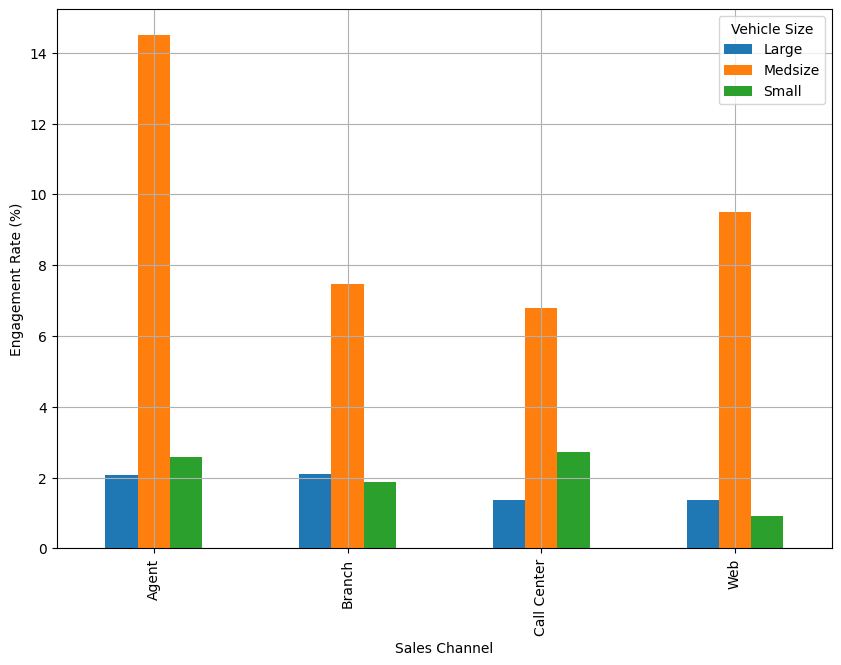

In [ ]:
ax = (by_sales_channel_data*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')

plt.show()

In [ ]:
# ENGAGEMENT RATES BY MONTHS SINCE POLICY INCEPTION

In [ ]:
by_months_since_inception_data = data.loc[data['Response'] == 'Yes'].groupby(by='Months Since Policy Inception')['Response'].count() / data.groupby(by='Months Since Policy Inception')['Response'].count() * 100.0

by_months_since_inception_data.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
        ...    
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.692308
Name: Response, Length: 100, dtype: float64

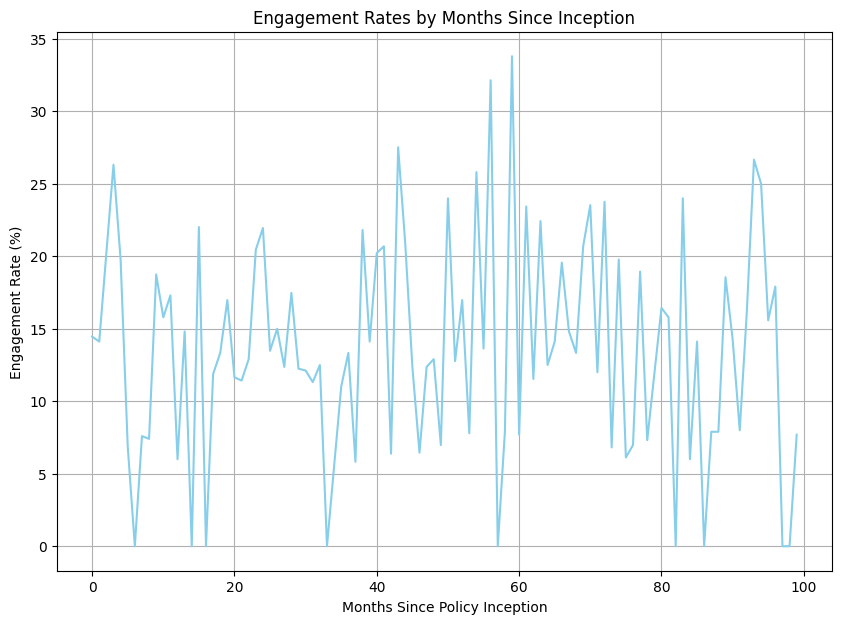

In [ ]:
ax = by_months_since_inception_data.fillna(0).plot(figsize=(10, 7),title='Engagement Rates by Months Since Inception',grid=True,color='skyblue')

ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate (%)')

plt.show()

In [ ]:
# Customer Segmentation by CLV & Months Since Policy Inception

In [ ]:
data['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [ ]:
data['CLV Segment'] = data['Customer Lifetime Value'].apply(
    lambda x: 'High' if x > data['Customer Lifetime Value'].median() else 'Low'
)

In [ ]:
data['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [ ]:
data['Policy Age Segment'] = data['Months Since Policy Inception'].apply(
    lambda x: 'High' if x > data['Months Since Policy Inception'].median() else 'Low'
)

In [ ]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Segment,Policy Age Segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High,Low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,High,Low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,High,High
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Low,Low


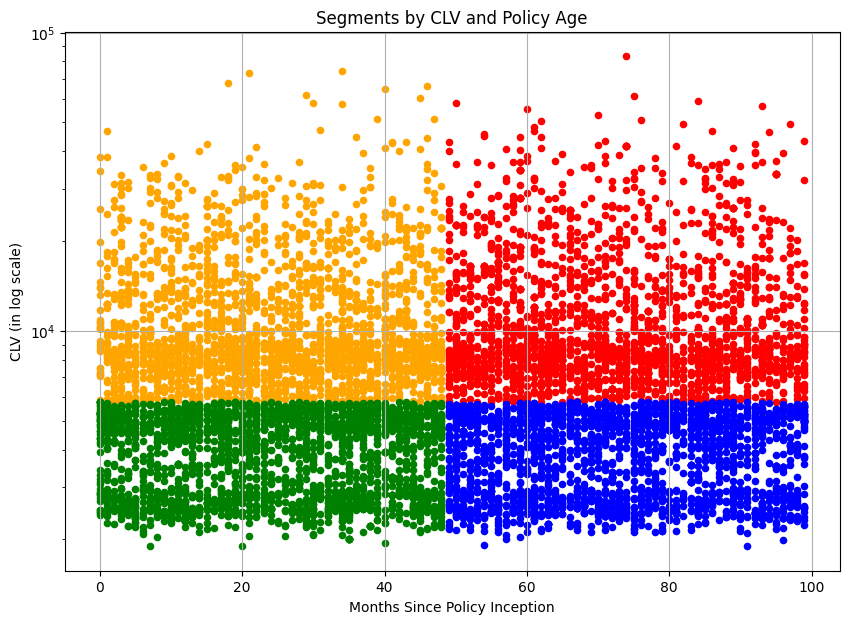

In [ ]:
ax = data.loc[
    (data['CLV Segment'] == 'High') & (data['Policy Age Segment'] == 'High')
].plot.scatter(
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='red'
)

data.loc[
    (data['CLV Segment'] == 'Low') & (data['Policy Age Segment'] == 'High')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='blue'
)

data.loc[
    (data['CLV Segment'] == 'High') & (data['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='orange'
)

data.loc[
    (data['CLV Segment'] == 'Low') & (data['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='green',
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')

ax.set_title('Segments by CLV and Policy Age')

plt.show()

In [ ]:
engagment_rates_by_segment_data = data.loc[
    data['Response'] == 'Yes'
].groupby(['CLV Segment', 'Policy Age Segment']).count()['Customer']/data.groupby(['CLV Segment', 'Policy Age Segment']).count()['Customer']

engagment_rates_by_segment_data

CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

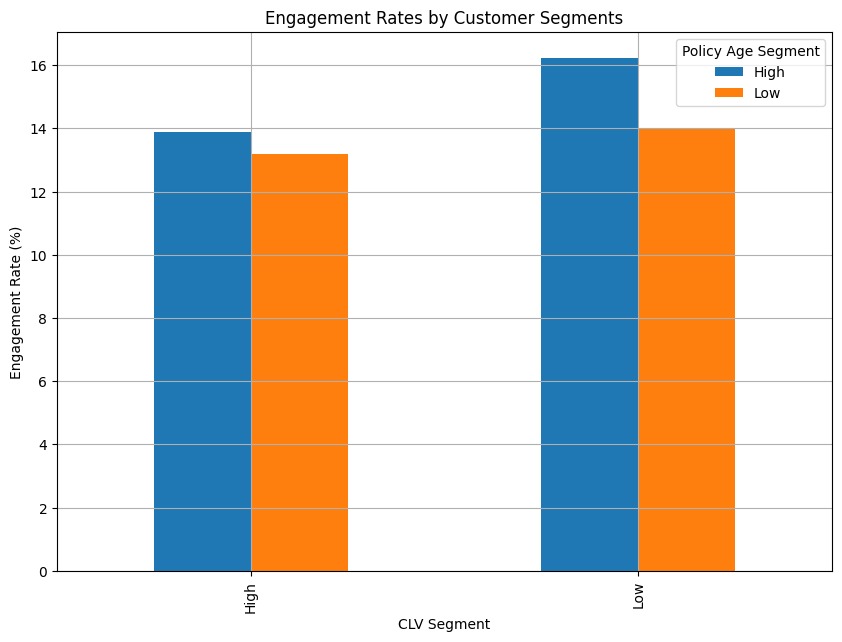

In [ ]:
ax = (engagment_rates_by_segment_data.unstack()*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)

ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')

plt.show()